# Notebook - GridWorld - ValueItertion - WithoutFunctions 

## Libraries

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


## Plot funcions

In [22]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 6

def plot_world(World):
    # ------------------
    Ly, Lx = World.shape

    fig, ax = plt.subplots()
    #fig.set_size_inches(4, 3) # i add this to decrease the size
    im = ax.imshow(World, cmap=plt.get_cmap("Spectral"))
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(Lx))
    ax.set_yticks(np.arange(Ly))

    goal = np.where(np.logical_or( World > 0.0, World < -1.0))
    blocks = np.where(World == -1.0)
    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j,goal[1]==i).any():
                text = ax.text(i,j, 'G{}'.format(int(World[j,i])), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                 text = ax.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                pass
    plt.show()
    # -------------------

    

def plot_world_values(World, Values):
    # ------------------
    Ly, Lx = World.shape

    fig, (ax, ax2) = plt.subplots(1,2)
    im = ax.imshow(World, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax.set_xticks(np.arange(Lx))
    ax.set_yticks(np.arange(Ly))

    goal = np.where(np.logical_or( World > 0.0, World < -1.0))
    blocks = np.where(World == -1.0)
    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j,goal[1]==i).any():
                text = ax.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                pass

    im2 = ax2.imshow(Values, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax2.set_xticks(np.arange(Lx))
    ax2.set_yticks(np.arange(Ly))

    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j, goal[1]==i).any():
                text = ax2.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax2.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                text = ax2.text(i, j, '{:.2f}'.format(Values[j, i]), ha="center", va="center", color="black")
                
                
    plt.show()
    # -------------------

    

def plot_world_values_policy(World, Values, Policy):
    # ------------------
    Ly, Lx = World.shape

    fig, (ax, ax2, ax3) = plt.subplots(1,3)
    im = ax.imshow(World, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax.set_xticks(np.arange(Lx))
    ax.set_yticks(np.arange(Ly))

    goal = np.where(np.logical_or( World > 0.0, World < -1.0))
    blocks = np.where(World == -1.0)
    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j,goal[1]==i).any():
                text = ax.text(i,j, 'G-{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                pass

    im2 = ax2.imshow(Values, cmap=plt.get_cmap("Spectral"))

    # We want to show all ticks...
    ax2.set_xticks(np.arange(Lx))
    ax2.set_yticks(np.arange(Ly))

    # Loop over data dimensions and create text annotations.
    for i in range(Lx):
        for j in range(Ly):
            if np.logical_and(goal[0]==j, goal[1]==i).any():
                text = ax2.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
                text = ax3.text(i,j, 'G{}'.format(World[j,i]), ha="center", va="center", color="black")
            elif np.logical_and(blocks[0]==j,blocks[1]==i).any():
                text = ax2.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
                text = ax3.text(i,j, 'X', ha="center", va="center", color="black", backgroundcolor="black")
            else:
                text = ax2.text(i, j, '{:.2f}'.format(Values[j, i]), ha="center", va="center", color="black")
    
    im3 = ax3.imshow(Values, cmap=plt.get_cmap("Spectral"))
    X = np.arange(Lx)
    Y = np.arange(Ly)
    U, V = Policy[:,:,1], -Policy[:,:,0]
    q = ax3.quiver(X, Y, U, V, color="black")

    plt.show()
    # -------------------
    

## Build the grid world

Visual representation of the gridworld:


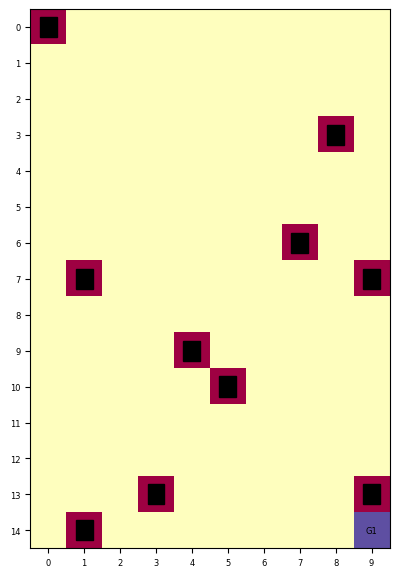

Matrix representation of the gridworld: 
[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0. -1.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [23]:
def new_world(Lx, Ly, Nblocks, goal, rewards):
    """
    Construct a gridworld of width Lx and height Ly, 
    with a number of blocks Nblocks (to be distributed randomly)
    and a list of tuple for positions of goal, and a list of corresponding rewards 
    """
    
    # Checks that the number of goals is consistent with the number of rewards
    assert len(goal) == len(rewards)
    
    # Constructs the empty matrix
    World = np.zeros((Ly,Lx)) # idk all x and y are always reversed
                              # ah ok, they are reversed in order to have the y before and so the up/down command before 
    
    # Fill the empty matrix with Nblocks blocks and goals
    n_inserted_blocks = 0
    while n_inserted_blocks < Nblocks:  
        y_block = np.random.randint(Ly) # def a random position (pos)
        x_block = np.random.randint(Lx)
        
        if ((y_block,x_block) in goal) == False: # if this pos is not in goal, put a block there
            World[y_block, x_block] = -1
            n_inserted_blocks += 1
    
    # Fill the entries of the matrix with:
    # -1 - if site is a block
    # reward[i] if site is in position goal[i]
    # 0 if site is neither a block nor a goal
    for g,r in zip(goal,rewards): # to each goal pos, assign the respective rew
        World[g] = r
    
    return World

# Example
Lx = 10
Ly = 15
Nblocks=10
goal = [(Ly-1,Lx-1)]
rewards_list = [1]

World = new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)

print("Visual representation of the gridworld:")
plot_world(World)

print("Matrix representation of the gridworld: ")
print(World)


## A single transiction in the GW

In [24]:
def p_transition(
        S, A, World, possible_actions = np.array([[1,0],[-1,0],[0,1],[0,-1]]), p = 1.0, random_flag = False
        ):
    """
    Takes the current position S and selected action A,
    and returns the resulting new S given a world World.
    """
    # Find the new position
    S_new = S + A
    Ly,Lx = World.shape 

    # Correct not allowed movements 
    # S_new can never go out of the world boundaries!
                # S_new[0] == Ly or S_new[1] == Lx   i.e. you go beyond the maximum high and maximum right
                # S_new[0] == -1 or S_new[0] == -1    i.e. you go beyond the minimum high and minimum left
    if S_new[0] == Ly or S_new[1] == Lx or np.any(S_new == -1): 
        S_new = S
    # S_new can never be on a block
    elif World[S_new[0],S_new[1]] == -1:
        S_new = S
    
    # returns the new state
    S_new_list = [S_new]
    P_list = [p]

    if random_flag: 
        # I move randomly with all actions with probability (1-p) / #Actions
        for act in possible_actions:
            S_new = S + act
            Ly, Lx = World.shape
            # if I go out of the world, I stay still
            if ((S_new[0] == Ly) or np.any(S_new == -1) or (S_new[1] == Lx)):
                S_new = S
            # if I found a block I stay still
            elif World[S_new[0],S_new[1]] == -1:
                S_new = S
            # returns the new state
            S_new_list += [S_new]
            P_list += [(1-p)/len(possible_actions)]

    return S_new_list, P_list 

In [25]:
def get_rewards(S_new, World):
    """
    Takes the current position S and selected action A,
    and returns the resulting reward given that it has ended up in S_new and 
    the gridwolrd is World.
    """
    reward = 0
    # Find the reward associated to the new position
        # The rew could be positive OR could be very negative.
        # We avoid the case rew = -1 since this is the codification of the block
    if (World[S_new[0],S_new[1]] > 0) or (World[S_new[0],S_new[1]] < -1):
        reward = World[S_new[0],S_new[1]]

    return reward

## A single iteration (of updating values)

In [26]:
def update_values(
        Values, World, gamma, possible_actions = np.array([[1,0],[-1,0],[0,1],[0,-1]]), p = 1.0, random_flag = False
        ):
    """
    Takes the current matrix of *Values* (V_k(s) )
    The associated gridworld *World*,
    And computes the bellman operator for a discount *gamma*   
    V_(k+1) (s) = max_a { sum_s'r   p(r, s'| s, a)(r + gamma V_k(s') }
                = max_a { sum_s'    p(s'| s, a)( r(s', s, a) + gamma V_k(s') }
                 
    And the relative best policy
    pi_(k+1)(s) = argmax_a { sum_s'r   p(r, s'| s, a)(r + gamma V_k(s') }
    
    Returns V_(k+1)(s) in *NewValues* and pi_(k+1)(s) in *NewPolicy*
    """
    
    # -----------------------------------------------------------
    # The dimension of the world
    Ly, Lx = World.shape
    # initialize the vectors to store the new values and policy
    NewValues = np.zeros((Ly,Lx))
    NewPolicy = np.zeros((Ly,Lx,2))

    goal = np.where(np.logical_or(World > 0.0, World < -1.0))
    
    # Do one Bellman update!
    # cycle on all the states
    for ix in range(Lx):
        for iy in range(Ly):
            S = np.array([iy,ix])

            if World[S[0],S[1]] != -1: # skip the blocks
                # find the best action
                best_action_value = -100

                for A in possible_actions: 
                    action_value = 0
                    S_new_list, P_list = p_transition(S = S, A = A, World = World, possible_actions = possible_actions,p = p, random_flag=random_flag) # S list of possible next states, P probability to go to each of the possible next states

                    for S_new, P in zip(S_new_list, P_list):
                        R = get_rewards(S_new = S_new, World = World)
                        action_value += P * (R + gamma * Values[S_new[0],S_new[1]])
                        
                    if action_value >= best_action_value:
                        best_action_value = action_value
                        best_action = A
                
                # Strore best value and best policy for state S
                NewValues[S[0],S[1]] = best_action_value
                NewPolicy[S[0],S[1],:] = best_action
   
    
    # REMEMBER THAT the Value for Terminal states is ALWAYS ZERO!
    # In the case you reach a goal, you stay still foreever
    for gx, gy in zip(goal[0],goal[1]):
        NewValues[gx, gy] = 0
        NewPolicy[gx, gy] = [0,0]
    # --------------------------------------------------------------
    return NewValues, NewPolicy

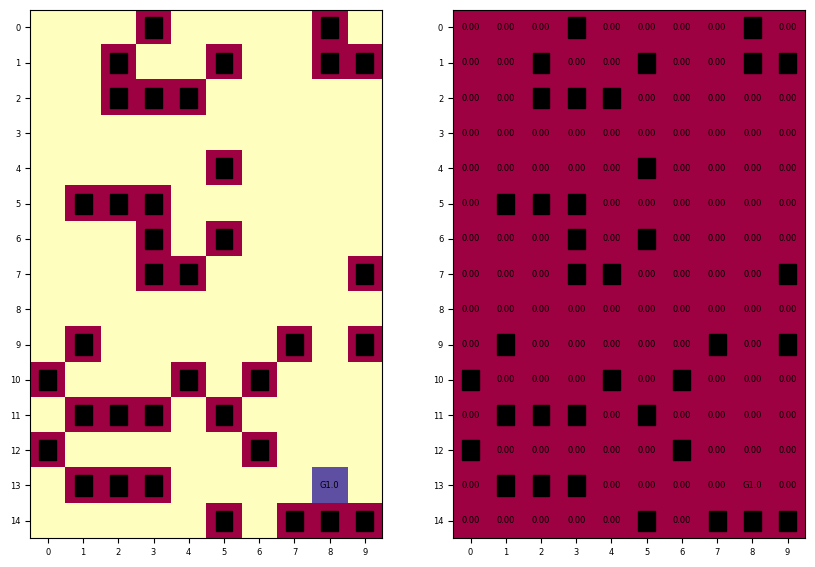

Distance btw V(0) and V(1) 0.1414213562373095


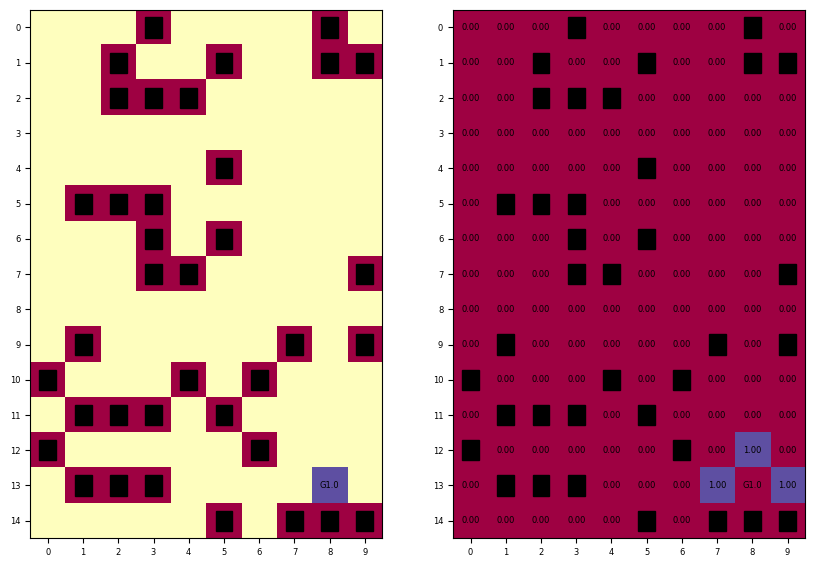

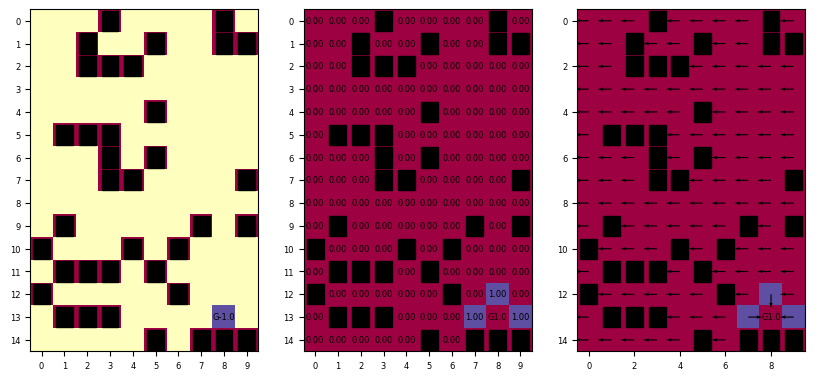

In [27]:
# Example
Lx = 10
Ly = 15
Nblocks=45
Actions = np.array([[1,0],[-1,0],[0,1],[0,-1]])

World = new_world(Lx = Lx, Ly = Ly, Nblocks = Nblocks, goal = [(13,8)], rewards = [1])
Values = np.zeros((15,10))
NewValues = np.zeros((15,10))

plot_world_values(World = World, Values = Values)

NewValues, Policy = update_values(
    Values = Values, World= World, gamma = 0.95, possible_actions=Actions, p=1, random_flag=False) # gamma = 0.95 -> we give importance to the far future 

how_much_V_changed = np.sqrt(np.mean( (NewValues - Values)**2 ))
print("Distance btw V(0) and V(1)", how_much_V_changed)

plot_world_values(World=World, Values=NewValues)

plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)

## To converge

In [28]:
# A single function 
def solve_grid_world(
        World, initial_values, max_n_of_iterations = 100, gamma = 0.95, tolerance = 0.0001, possible_actions = Actions, p = 1, random_flag = False
        ):
    NewValues = initial_values
    do_we_reach_tolerance = False
    # And do iterative updates of the value matrix until tolerance!
    for i in range(max_n_of_iterations):
        Values = NewValues
        NewValues, Policy = update_values(Values=Values, World=World, gamma=gamma, possible_actions=possible_actions, p = p, random_flag=random_flag) # one update

        # Check if you reached the tolerance 
        distance_btw_consecutive_V = np.sqrt(np.mean( (NewValues - Values)**2 ))
        if distance_btw_consecutive_V < tolerance:
            do_we_reach_tolerance = True
            info_about_the_consecutive_V_distance = 'Distance between V_{}(S) and V_{}(S) is: {}'.format(i, i+1, distance_btw_consecutive_V) 
            result_info = [do_we_reach_tolerance, info_about_the_consecutive_V_distance]
            return World, NewValues, Policy, result_info

    info_about_the_consecutive_V_distance = 'Distance between V_{}(S) and V_{}(S) is: {}'.format(max_n_of_iterations, max_n_of_iterations+1, distance_btw_consecutive_V) 
    result_info = [do_we_reach_tolerance, info_about_the_consecutive_V_distance]
    
    return World, NewValues, Policy, result_info


In [29]:
def get_info_about_result(result_info):
    if result_info[0] == True:
        return "Yes, we converge w.r.t. our tolerance\n"+result_info[1]
    else:
        return "No, we stop before reaching the tolerance threshold\n"+result_info[1]

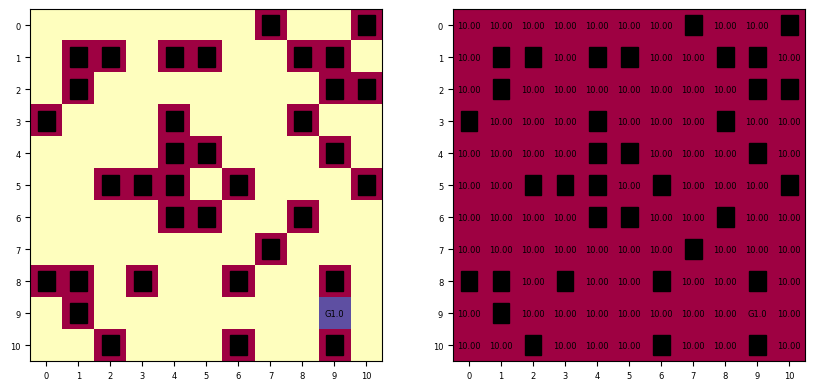

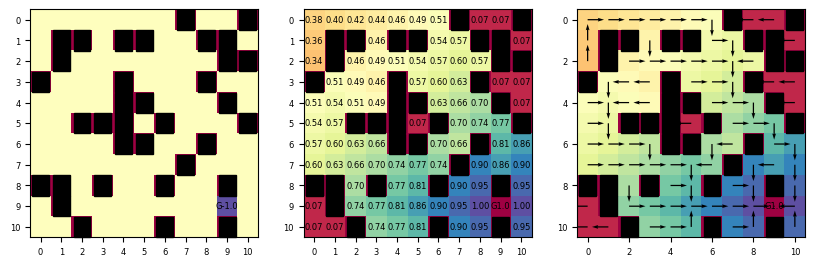

Yes, we converge w.r.t. our tolerance
Distance between V_97(S) and V_98(S) is: 0.000992583455835669


In [30]:
# Example

# Parameters
Lx = 11
Ly = 11
Nblocks = 40
goal = [(9,9)]
rewards_list = [1]

# Build the world (and initial values)
World = new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.ones((Ly,Lx))*10

# Solve and plot
plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info = solve_grid_world(
    World = World, initial_values = Values, max_n_of_iterations = 300, gamma = 0.95, tolerance = 0.001, possible_actions = Actions, p = 1, random_flag=False)
plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( get_info_about_result(result_info = result_info) )

## Example 2: Multiple goals
Try to execute playing with different gamma. \
You will see the behaviour is different dependi on how much far do you see.

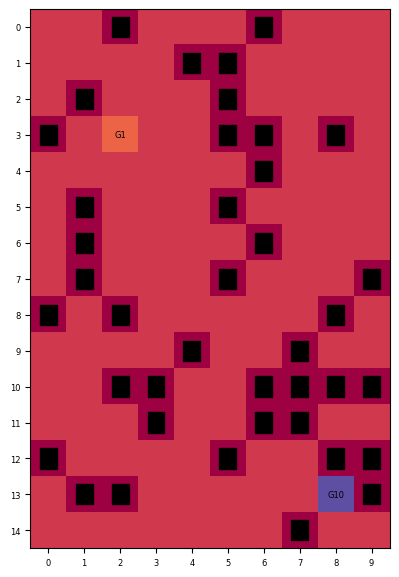

In [31]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 45
goal = [(13,8),(3,2)]
rewards_list = [10,1]

# Build the world (and initial values)
World_2 = new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values_2 = np.zeros((Ly,Lx))

# Plot
plot_world(World=World_2)

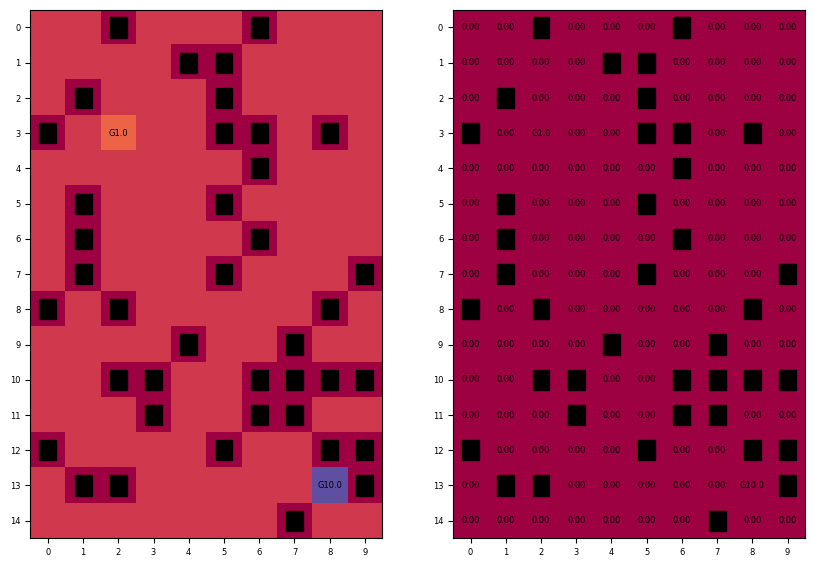

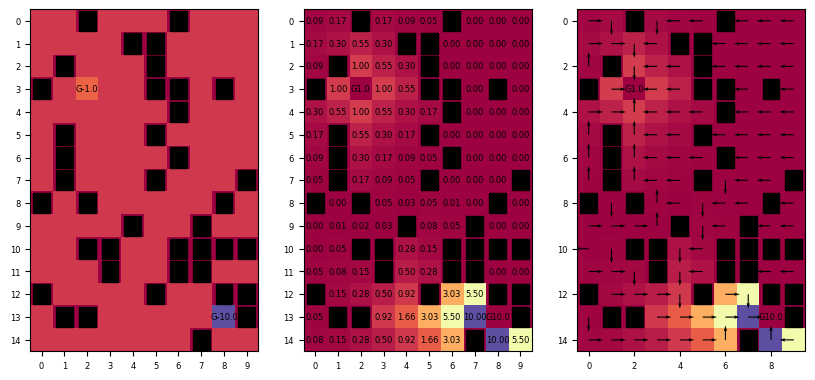

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 0.007966197221294456


In [32]:
# Solve and plot
plot_world_values(World=World_2, Values=Values_2)
World_2, NewValues_2, Policy_2, result_info_2 = solve_grid_world(
    World = World_2, initial_values = Values_2, max_n_of_iterations = 10, gamma = 0.55, tolerance = 0.001, possible_actions=Actions, p=1, random_flag=False)
plot_world_values_policy(World=World_2, Values=NewValues_2, Policy=Policy_2)
print( get_info_about_result(result_info=result_info_2) )

## Example 3: Random approach

Usually we use $p = 1$, then implicates that we everytimes do the best action we can. \
With $p < 1$, we introduce the possibility (of probability $1-p$) to do a random action.

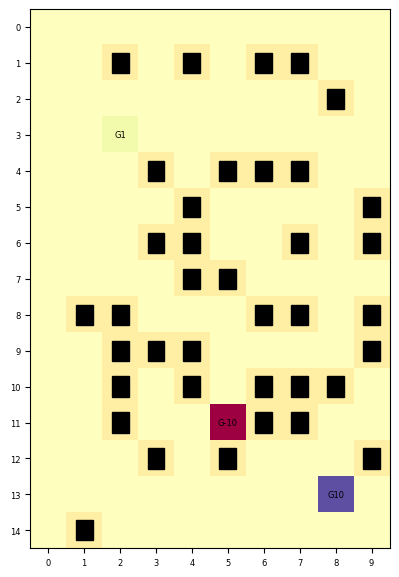

In [33]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 45
goal = [(13,8),(3,2)]
rewards_list = [10,1]

# Build the world (and initial values)
World_3 = new_world(Lx = Lx, Ly = Ly, Nblocks = Nblocks, goal=[(13,8),(3,2),(11,5)],rewards=[10,1,-10])
Values_3 = np.zeros((Ly,Lx))

# Plot
plot_world(World=World_3)

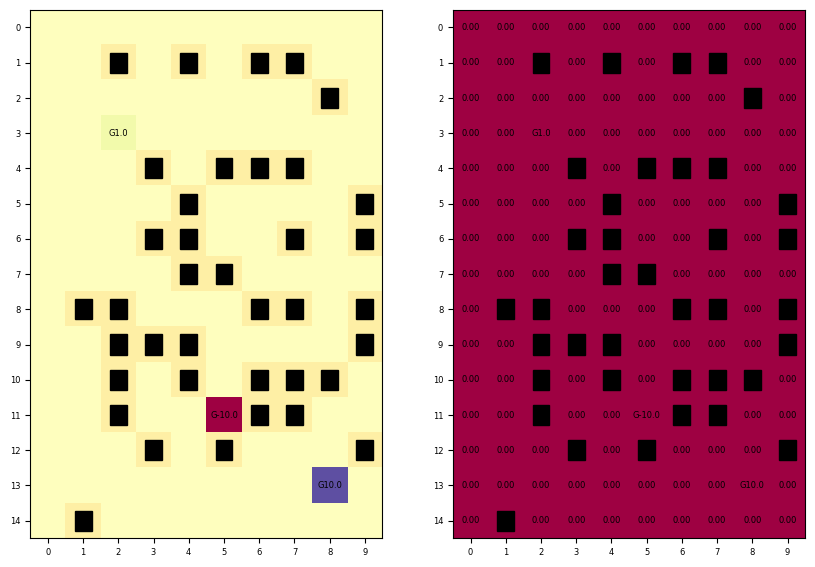

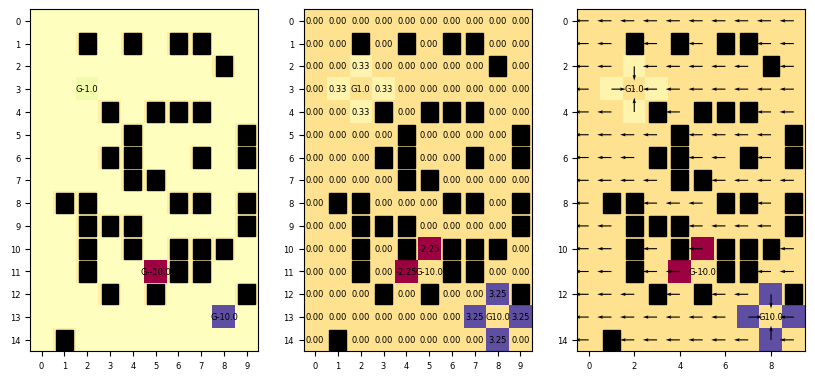

No, we stop before reaching the tolerance threshold
Distance between V_1(S) and V_2(S) is: 0.5932818329709189


In [35]:
# Solve and plot
plot_world_values(World=World_3, Values=Values_3)
World_3, NewValues_3, Policy_3, result_info_3 = solve_grid_world(
    World = World_3, initial_values = Values_3, max_n_of_iterations = 1, gamma = 0.95, tolerance = 0.001, possible_actions = Actions, p = 0.1, random_flag=True)
plot_world_values_policy(World=World_3, Values=NewValues_3, Policy=Policy_3)
print( get_info_about_result(result_info = result_info_3) )

Introducing the random component appears to not affect the fact we will take the optimum choice ... Gaia, it could be interesting that you understand why🙂🙂🙂🙂🙂